,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,TEST_RESULT,ICU,DIED
0,2,12,1,1,9999-99-99,97,2,41,2,2,...,2,2,2,2,2,2,2,7,97,0
1,2,12,2,1,9999-99-99,97,2,57,2,1,...,2,2,2,2,1,2,1,5,97,0
2,2,4,2,1,9999-99-99,97,2,38,2,2,...,2,2,2,2,1,2,1,3,97,0
3,2,9,1,1,9999-99-99,97,2,68,2,2,...,2,2,2,1,2,2,2,7,97,0
4,1,12,2,1,9999-99-99,97,2,63,2,2,...,2,1,2,2,2,2,2,7,97,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           100000 non-null  int64 
 1   MEDICAL_UNIT    100000 non-null  int64 
 2   SEX             100000 non-null  int64 
 3   PATIENT_TYPE    100000 non-null  int64 
 4   DATE_DIED       100000 non-null  object
 5   INTUBED         100000 non-null  int64 
 6   PNEUMONIA       100000 non-null  int64 
 7   AGE             100000 non-null  int64 
 8   PREGNANT        100000 non-null  int64 
 9   DIABETES        100000 non-null  int64 
 10  COPD            100000 non-null  int64 
 11  ASTHMA          100000 non-null  int64 
 12  INMSUPR         100000 non-null  int64 
 13  HYPERTENSION    100000 non-null  int64 
 14  OTHER_DISEASE   100000 non-null  int64 
 15  CARDIOVASCULAR  100000 non-null  int64 
 16  OBESITY         100000 non-null  int64 
 17  RENAL_CHRONIC   100000 non-nul

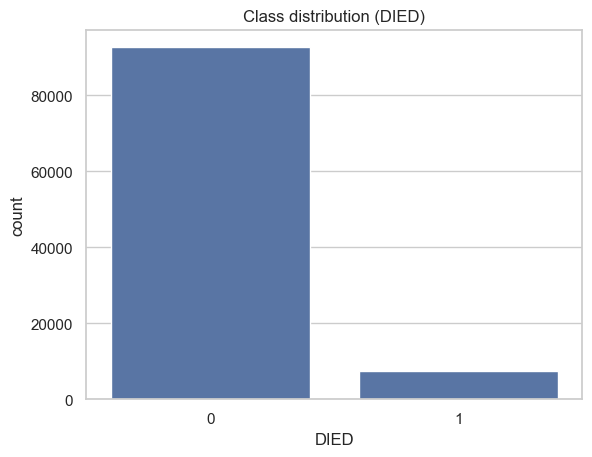

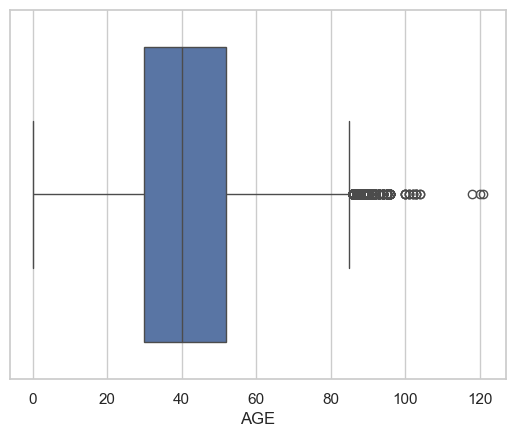

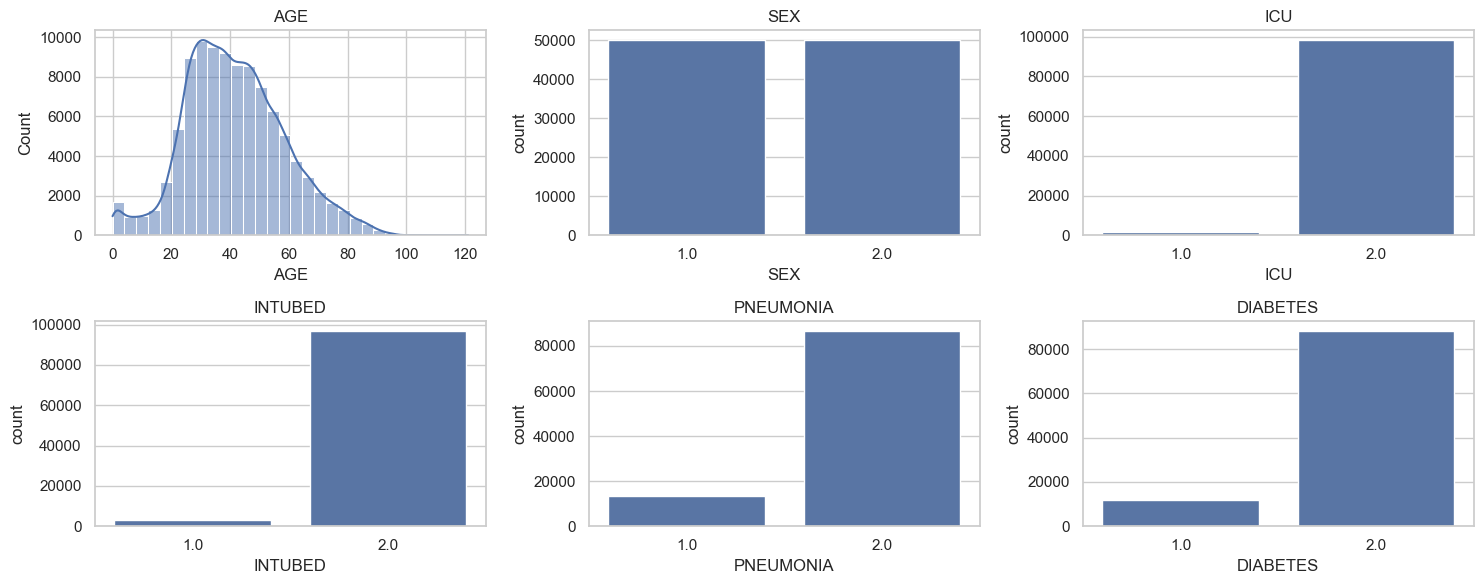

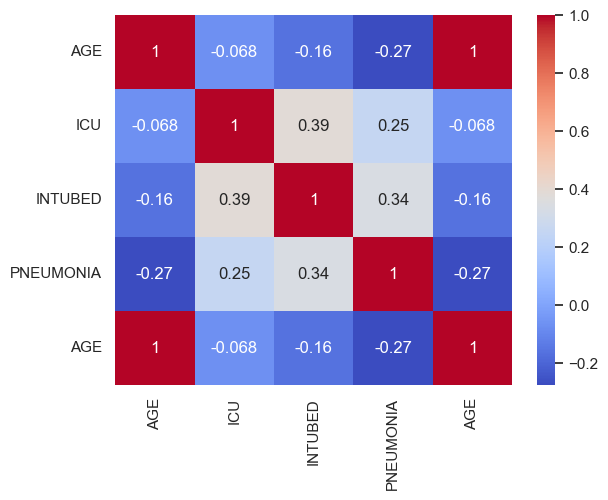

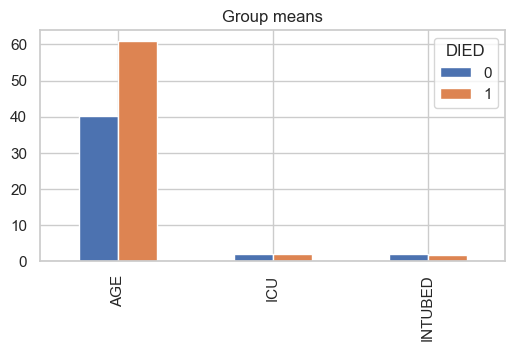

In [3]:
# 0. Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.impute import SimpleImputer
sns.set(style="whitegrid")

# 1. Load data
df = pd.read_csv("./data/custom_covid19.csv")
df['DIED'] = (df['DATE_DIED']!='9999-99-99').astype(int)   # <— 只做一次
display(df.head(5)); df.info()

# 2. Variable groups
cat_cols = [c for c in df if df[c].nunique()<=20 and c not in ['DATE_DIED','DIED']]
num_cols = ['AGE']

# 3. Missing values
df.replace({97:np.nan,98:np.nan,99:np.nan}, inplace=True)
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])

# optional barplot of missing before fill ...

# 4. Target distribution  ❗
sns.countplot(x='DIED', data=df)
plt.title('Class distribution (DIED)'); plt.show()

# 5. Outlier check (AGE)
Q1,Q3 = df['AGE'].quantile([.25,.75]); IQR=Q3-Q1
sns.boxplot(x='AGE', data=df); plt.show()

# 6. Univariate distributions (key vars)
key = ['AGE','SEX','ICU','INTUBED','PNEUMONIA','DIABETES']
fig,ax = plt.subplots(2,3,figsize=(15,6))
for i,col in enumerate(key):
    a=ax.ravel()[i]
    if df[col].nunique()<=10: sns.countplot(x=col,data=df,ax=a)
    else: sns.histplot(df[col],bins=30,kde=True,ax=a)
    a.set_title(col)
plt.tight_layout(); plt.show()

# 7. Correlation heatmap
corr = df[num_cols+['ICU','INTUBED','PNEUMONIA','AGE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm'); plt.show()

# 8. Grouped means
(df.groupby('DIED')[['AGE','ICU','INTUBED']].mean()
   .T.plot.bar(figsize=(6,3))); plt.title('Group means'); plt.show()

# 9. Save clean
df.to_csv('./data/custom_covid19_cleaned.csv', index=False)
